### Introdução

### Importações gerais

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pathlib as pl

In [2]:
pd.set_option("display.max_columns", None)

### Lendo datasets

In [3]:
dataset_path = pl.Path("../data")
#Lendo datasets
df_train = pd.read_csv(str(list(dataset_path.glob("*/train.csv"))[0]), low_memory=False)
df_test = pd.read_csv(str(list(dataset_path.glob("*/test.csv"))[0]), low_memory=False)

In [4]:
df_test.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,number_of_reviews,instant_bookable,amenities,property_type,room_type,cancellation_policy
0,17878,https://www.airbnb.com/rooms/17878,2.018082e+13,2018-08-16,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2.0,-22.965919,-43.178962,5,1.0,2.0,2.0,$58.00,4,213.0,t,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Condominium,Entire home/apt,strict_14_with_grace_period
1,25026,https://www.airbnb.com/rooms/25026,2.018082e+13,2018-08-16,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3.0,-22.977117,-43.190454,3,1.0,1.0,2.0,$45.00,4,214.0,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Apartment,Entire home/apt,strict_14_with_grace_period
2,46937,https://www.airbnb.com/rooms/46937,2.018082e+13,2018-08-16,Beautiful studio in Santa with terrace,The property is very special. It is a studio w...,I'm the proud onwner of a beautiful studio in ...,The property is very special. It is a studio w...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3.0,-22.921990,-43.183836,3,1.0,0.0,2.0,$0.00,3,1.0,f,"{TV,Wifi,Kitchen,""Smoking allowed"",""Pets allow...",Apartment,Entire home/apt,strict_14_with_grace_period
3,48726,https://www.airbnb.com/rooms/48726,2.018082e+13,2018-08-16,Rio de Janeiro Copacabana Ipanema,"Apartamento tem três dormitórios, dois banheir...",Excelente acomodação perto da praia mais famos...,"Apartamento tem três dormitórios, dois banheir...",none,"Amo a paisagem, arvores a proximidade da praia...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1.0,-22.983593,-43.193819,1,1.0,1.0,1.0,$0.00,3,13.0,t,"{TV,""Cable TV"",Wifi,Breakfast,Elevator,""Free s...",Apartment,Private room,strict_14_with_grace_period
4,51703,https://www.airbnb.com/rooms/51703,2.018082e+13,2018-08-16,"Ocean view Copacabana,Ipanema",Oh....i love to host and to meet people intere...,The studio it is complete furnished and equipe...,Oh....i love to host and to meet people intere...,none,"It is located in the hotspot of Rio, wonderful...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2.0,-22.981082,-43.190776,2,1.0,0.0,2.0,$100.00,3,100.0,t,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Apartment,Entire home/apt,strict_14_with_grace_period


In [5]:
df_train.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_is_superhost',
       'host_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'instant_bookable', 'amenities', 'property_type',
       'room_type', 'cancellation_policy', 'price'],
      dtype='object')

In [6]:
df_train.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,number_of_reviews,instant_bookable,amenities,property_type,room_type,cancellation_policy,price
0,947924,https://www.airbnb.com/rooms/947924,2.018082e+13,2018-08-16,LARGE LOVELY ROOM GREAT FOR GROUPS,NaN,This large lovely room is perfect for any grou...,This large lovely room is perfect for any grou...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,5.0,-22.935381,-43.199022,6,1.0,1.0,4.0,$82.00,1,4.0,f,"{Internet,Wifi,Kitchen,""Free parking on premis...",House,Private room,strict_14_with_grace_period,$229.00
1,2747040,https://www.airbnb.com/rooms/2747040,2.019072e+13,2019-07-16,Alugo para a Copa do mundo,"Excelente apto, localizado a 500 metros de dis...",NaN,"Excelente apto, localizado a 500 metros de dis...",none,NaN,10.0,10.0,30.0,30.0,10.0,30.0,0.0,1.0,0.0,0.0,f,1.0,-22.912320,-43.219480,5,1.0,3.0,3.0,$0.00,10,0.0,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Apartment,Entire home/apt,moderate,"$1,502.00"
2,13734316,https://www.airbnb.com/rooms/13734316,2.018112e+13,2018-11-15,Apartamento para temporada,Meu espaço é perto de Vila olímpica dos atleta...,NaN,Meu espaço é perto de Vila olímpica dos atleta...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,-22.965607,-43.409884,4,1.0,2.0,3.0,$0.00,30,0.0,t,"{TV,""Air conditioning"",Pool,Kitchen,""Free park...",Apartment,Entire home/apt,flexible,$569.00
3,30979175,https://www.airbnb.com/rooms/30979175,2.019092e+13,2019-09-24,2-Ensuite flat with stunning sea view!,Enjoy the most beautiful sight of Recreio dos ...,The flat is newly refurbished and has a modern...,Enjoy the most beautiful sight of Recreio dos ...,none,NaN,2.0,4.0,15.0,15.0,2.4,15.0,20.0,1.0,0.0,0.0,t,1.0,-23.030740,-43.477210,5,2.5,2.0,4.0,$75.00,2,20.0,f,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",Apartment,Entire home/apt,moderate,$499.00
4,3742926,https://www.airbnb.com/rooms/3742926,2.018121e+13,2018-12-14,Condomino,"Rio-Stadtteil JACAREPAGUA-CURICICA, kein Touri...",NaN,"Rio-Stadtteil JACAREPAGUA-CURICICA, kein Touri...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2.0,-22.949252,-43.388894,4,2.0,2.0,3.0,$88.00,7,0.0,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",House,Private room,flexible,$132.00


### Categorização inicial de colunas por tipo de dados 

A primeira vista, foi possível identificar os seguintes tipos de colunas:
- tipo texto: 'name','summary', 'space', 'description', 'experiences_offered' e 'neighborhood_overview';
- tipo numérico: 'minimum_minimum_nights', 'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm',
'maximum_nights_avg_ntm','number_of_reviews_ltm','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
'calculated_host_listings_count_shared_rooms','host_listings_count', 'latitude', 'longitude', 'accommodates','bathrooms','bedrooms', 'beds', 'extra_people', 'minimum_nights', 'number_of_reviews' e 'price';
- tipo booleano: "host_is_superhost", "instant_bookable";
- tipo categórica nominal: "property_type","room_type";
- tipo categórica ordinal: "cancellation_policy".
- tipo lista: "amenities"

As colunas restantes, 'listing_url', 'scrape_id' e 'experiences_offered', serão removidas da análise por não apresentarem informação útil para a regressão linear proposta.

In [7]:
#Colunas a serem removidas
columns_to_drop = ['id', 'listing_url', 'scrape_id', 'experiences_offered', 'last_scraped']


#Separando os tipos de variáveis por meio de analise qualitativa
text_columns = ['name','summary', 'space', 'description', 'neighborhood_overview']

numerical_variables = ['minimum_minimum_nights', 'maximum_minimum_nights','minimum_maximum_nights',
                       'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
                       'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes',
                       'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
                       'host_listings_count', 'latitude', 'longitude', 'accommodates','bathrooms',
                       'bedrooms', 'beds', 'extra_people', 'minimum_nights','number_of_reviews']

boolean_variables = ["host_is_superhost", "instant_bookable"]

nominal_categoric_variables = ["property_type","room_type"]

ordinal_categoric_variables = ["cancellation_policy"]

Dentre as colunas numéricas, algumas necessitam de um tratamento especial. Primeiramente, as colunas as colunas 'extra_people' e 'price' que têm carater numérico mas nesse caso aparece como texto devido ao emprego da cotação em dolar. 

In [8]:
#Removendo as colunas sem valor sem informação útil para as amostras de treino e de teste
df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

### Tratamento das colunas por tipo de dados

Verificando os valores únicos da coluna 'room_type' em df_train, encontrei um registro com valores aparentemente misturados entre as colunas, então decidi removê-lo

In [9]:
df_train["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room',
       '2019-03-06'], dtype=object)

In [10]:
#Verificando a linha com dados confusos
df_train.query('room_type == "2019-03-06"')

,name,summary,space,description,neighborhood_overview,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,number_of_reviews,instant_bookable,amenities,property_type,room_type,cancellation_policy,price
213883,https://a0.muscache.com/im/users/7056870/profi...,https://a0.muscache.com/im/users/7056870/profi...,NaN,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Real Bed,43.0,43.0,2019-03-06,100.0,10.0,10.0,moderate,f,2.0,NaN,10.0,1,2019-03-06,NaN,10.0


In [11]:
#Remoção de dados falhos e reset_index dataframe
df_train = df_train.drop(df_train.query('room_type == "2019-03-06"').index).reset_index(drop=True)

In [12]:
df_train.dropna(inplace=True)

#### Colunas tipo texto

Para as colunas tipo texto, apenas utilizarei do fato delas terem sido preenchidas, para verificar se de alguma forma isso impacta no valor final. O conteúdo do texto poderia ser extraido de alguma forma e transformado em keywords para serem analisadas como variável categórica nominal. No entanto, pode haver muito enviesamento no preenchimento dessas colunas, dado que o objetivo dos usuários é de venderem o seu produto.

In [12]:
#Apricando valor 0 para todas os registros nulos das colunas tipo texto e 1 caso contrário nos dados de treinamento
df_train[df_train[text_columns].notnull()] = 1
df_train[text_columns] = df_train[text_columns].astype(float).fillna(0)

#Apricando valor 0 para todas os registros nulos das colunas tipo texto e 1 caso contrário nos dados de teste
df_test[df_test[text_columns].notnull()] = 1
df_test[text_columns] = df_test[text_columns].astype(float).fillna(0)

In [13]:
pd.concat([df_train.head(),df_test.head()])

,name,summary,space,description,neighborhood_overview,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,number_of_reviews,instant_bookable,amenities,property_type,room_type,cancellation_policy,price
0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,5.0,-22.935381,-43.199022,6,1.0,1.0,4.0,$82.00,1,4.0,f,"{Internet,Wifi,Kitchen,""Free parking on premis...",House,Private room,strict_14_with_grace_period,$229.00
1,1.0,1.0,0.0,1.0,0.0,10.0,10.0,30.0,30.0,10.0,30.0,0.0,1.0,0.0,0.0,f,1.0,-22.912320,-43.219480,5,1.0,3.0,3.0,$0.00,10,0.0,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Apartment,Entire home/apt,moderate,"$1,502.00"
2,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,-22.965607,-43.409884,4,1.0,2.0,3.0,$0.00,30,0.0,t,"{TV,""Air conditioning"",Pool,Kitchen,""Free park...",Apartment,Entire home/apt,flexible,$569.00
3,1.0,1.0,1.0,1.0,0.0,2.0,4.0,15.0,15.0,2.4,15.0,20.0,1.0,0.0,0.0,t,1.0,-23.030740,-43.477210,5,2.5,2.0,4.0,$75.00,2,20.0,f,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",Apartment,Entire home/apt,moderate,$499.00
4,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2.0,-22.949252,-43.388894,4,2.0,2.0,3.0,$88.00,7,0.0,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",House,Private room,flexible,$132.00
0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2.0,-22.965919,-43.178962,5,1.0,2.0,2.0,$58.00,4,213.0,t,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Condominium,Entire home/apt,strict_14_with_grace_period,NaN
1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3.0,-22.977117,-43.190454,3,1.0,1.0,2.0,$45.00,4,214.0,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Apartment,Entire home/apt,strict_14_with_grace_period,NaN
2,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3.0,-22.921990,-43.183836,3,1.0,0.0,2.0,$0.00,3,1.0,f,"{TV,Wifi,Kitchen,""Smoking allowed"",""Pets allow...",Apartment,Entire home/apt,strict_14_with_grace_period,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1.0,-22.983593,-43.193819,1,1.0,1.0,1.0,$0.00,3,13.0,t,"{TV,""Cable TV"",Wifi,Breakfast,Elevator,""Free s...",Apartment,Private room,strict_14_with_grace_period,NaN
4,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2.0,-22.981082,-43.190776,2,1.0,0.0,2.0,$100.00,3,100.0,t,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Apartment,Entire home/apt,strict_14_with_grace_period,NaN


#### Colunas tipo numéricas

In [14]:
df_train[numerical_variables].isnull().sum()

minimum_minimum_nights                          136969
maximum_minimum_nights                          136969
minimum_maximum_nights                          136969
maximum_maximum_nights                          136969
minimum_nights_avg_ntm                          136969
maximum_nights_avg_ntm                          136969
number_of_reviews_ltm                           136969
calculated_host_listings_count_entire_homes     136969
calculated_host_listings_count_private_rooms    136969
calculated_host_listings_count_shared_rooms     136969
host_listings_count                                294
latitude                                             0
longitude                                            0
accommodates                                         0
bathrooms                                         1126
bedrooms                                           592
beds                                              1759
extra_people                                         0
minimum_ni

In [15]:
df_test[numerical_variables].isnull().sum()

minimum_minimum_nights                          46153
maximum_minimum_nights                          46153
minimum_maximum_nights                          46153
maximum_maximum_nights                          46153
minimum_nights_avg_ntm                          46153
maximum_nights_avg_ntm                          46153
number_of_reviews_ltm                           46153
calculated_host_listings_count_entire_homes     46153
calculated_host_listings_count_private_rooms    46153
calculated_host_listings_count_shared_rooms     46153
host_listings_count                                91
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                         367
bedrooms                                          183
beds                                              575
extra_people                                        0
minimum_nights              

In [14]:
def format_cash(value):
    formated_value = re.sub(r'[\$\,]','',value)
    return float(formated_value)

#Formatando colunas com formato de moeda
df_train.loc[:,["extra_people", "price"]] = df_train.loc[:,["extra_people", "price"]].map(format_cash)
df_test.loc[:,["extra_people"]] = df_test.loc[:,["extra_people"]].map(format_cash)

In [15]:
#Garantindo que todas as colunas restantes estão como tipo float
df_train[numerical_variables] = df_train[numerical_variables].astype(float)
df_test[numerical_variables] = df_test[numerical_variables].astype(float)

Para tratar as colunas vazias numéricas, apenas utilizarei aplicarei a média dos valores já existentes.

In [16]:
#Aplicando a média dos valores numéricos existentes nos valores faltantes
for col in numerical_variables:
    mean_train = df_train[col].mean()
    mean_test = df_test[col].mean()
    df_train[col] = df_train[col].fillna(mean_train)
    df_test[col] = df_test[col].fillna(mean_train)

Agora, para finalizar o tratamento das variáveis numéricas, aplicarei uma normalização para que todos os valores estejam entre -1 e 1. Para isso aplicarei o 'Max-Absolute Scaling'.

In [17]:
#from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler

# Inicializando o  MaxAbsoluteScaler
#max_abs_scaler = MaxAbsScaler()
standard_scaler = StandardScaler()

# Aplicando a normalização
#df_train[numerical_variables] = max_abs_scaler.fit_transform(df_train[numerical_variables])
#df_test[numerical_variables] = max_abs_scaler.fit_transform(df_test[numerical_variables])
df_train[numerical_variables] = standard_scaler.fit_transform(df_train[numerical_variables])
df_test[numerical_variables] = standard_scaler.fit_transform(df_test[numerical_variables])

#### Colunas tipo booleano

Nesse caso, basta aplicar os valores 0 e 1 para os valores f e t, respectivamente:

In [18]:
#Trantando valores nulos utilizando backward_fill
df_train.loc[:,boolean_variables] = df_train.loc[:,boolean_variables].bfill()
df_test.loc[:,boolean_variables] = df_test.loc[:,boolean_variables].bfill()

#Formatando colunas tipo booleano
d = {'f':0, 't':1}
df_train.loc[:,boolean_variables] = df_train.loc[:,boolean_variables].map(lambda x: d.get(x)).astype(int)
df_test.loc[:,boolean_variables] = df_test.loc[:,boolean_variables].map(lambda x: d.get(x)).astype(int)

#### Colunas categóricas nominais

Para as colunas categórigas nominais, utilizarei o "One Hot Encoding" já implementada pela biblioteca sklearn

In [19]:
from sklearn.preprocessing import OneHotEncoder

#Definindo categorias a serem utilizadas pela amostra de treino
categories = [list(df_train["property_type"].unique()),
              list(df_train["room_type"].unique())]

#Inicializando o OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, categories=categories, drop='first')

# Aplicando o encoding nas colunas selecionadas
oh_encoded_columns_train = one_hot_encoder.fit_transform(df_train[nominal_categoric_variables])
oh_encoded_columns_test = one_hot_encoder.fit_transform(df_test[nominal_categoric_variables])

# Criando Dataframe com as colunas transformadas 
oh_encoded_df_train = pd.DataFrame(oh_encoded_columns_train, columns=one_hot_encoder.get_feature_names_out(nominal_categoric_variables))
oh_encoded_df_test = pd.DataFrame(oh_encoded_columns_test, columns=one_hot_encoder.get_feature_names_out(nominal_categoric_variables))

# Removendo colunas nominais categóricas originais
df_train.drop(columns=nominal_categoric_variables, inplace=True)
df_test.drop(columns=nominal_categoric_variables, inplace=True)

# Concatenando DataFrames tratados com os originais
df_train = pd.concat([df_train, oh_encoded_df_train], axis=1)
df_test = pd.concat([df_test, oh_encoded_df_test], axis=1)

#### Coluna tipo Categóricas Ordinais

Para tratar a coluna 'cancellation_policy' que é categórica ordinal, apenas utilizarei o "OrdinalEncoding" implementado na biblioteca sklearn

In [20]:
ordinal_categoric_variables

['cancellation_policy']

In [21]:
from sklearn.preprocessing import OrdinalEncoder

# Definindo a ordem do ordinal encoding
cancellation_policy_order = ['super_strict_60', 'super_strict_30', 'strict','strict_14_with_grace_period', 'moderate', 'flexible']

# Inicializando o Ordinal Encoder com a ordem específicada
ordinal_encoder = OrdinalEncoder(categories=[cancellation_policy_order])

# Transformando a coluna "cancellation_pollicy"
df_train[ordinal_categoric_variables] = ordinal_encoder.fit_transform(df_train[ordinal_categoric_variables])
df_test[ordinal_categoric_variables] = ordinal_encoder.fit_transform(df_test[ordinal_categoric_variables])

#### Coluna tipo lista

A coluna "amenities" é do tipo lista e parece ter informações bastante relevantes com relação ao preço do airbnb, por isso, para tratá-la, a transformarei e aplicarei one hot encoding para cada um dos itens dessa coluna.

In [22]:
# Função para formatar os dados da coluna amenities de modo a se obter uma lista com cada um dos itens separados.
def format_amenities(string):
    splitted = re.sub(r'{|}|"', "", string).split(",")
    return splitted

In [23]:
# Aplicando a formatação à coluna amenities
df_train["amenities"] = df_train["amenities"].apply(format_amenities)
df_test["amenities"] = df_test["amenities"].apply(format_amenities)

In [24]:
unique_values_amenities = []

#Obtendo todos os possíveis itens em amenities para df_train
for row in df_train["amenities"].values:
    for item in row:
        if item not in unique_values_amenities:
            unique_values_amenities.append(item)

#Adicionando todos os possíveis itens em amenities em df_test
for row in df_test["amenities"].values:
    for item in row:
        if item not in unique_values_amenities:
            unique_values_amenities.append(item)

In [25]:
index_amenities = {x:i for i,x in enumerate(unique_values_amenities)}
index_amenities

{'Internet': 0,
 'Wifi': 1,
 'Kitchen': 2,
 'Free parking on premises': 3,
 'Breakfast': 4,
 'Family/kid friendly': 5,
 'Washer': 6,
 'Dryer': 7,
 'TV': 8,
 'Cable TV': 9,
 'Air conditioning': 10,
 'Smoking allowed': 11,
 'Doorman': 12,
 'Gym': 13,
 'Elevator': 14,
 'Buzzer/wireless intercom': 15,
 'Fire extinguisher': 16,
 'Pool': 17,
 'Suitable for events': 18,
 'Essentials': 19,
 'Shampoo': 20,
 'Lock on bedroom door': 21,
 'Hangers': 22,
 'Hair dryer': 23,
 'Iron': 24,
 'Laptop friendly workspace': 25,
 'Paid parking off premises': 26,
 'Free street parking': 27,
 'Hot water': 28,
 'Bed linens': 29,
 'Extra pillows and blankets': 30,
 'Microwave': 31,
 'Coffee maker': 32,
 'Refrigerator': 33,
 'Dishes and silverware': 34,
 'Cooking basics': 35,
 'Oven': 36,
 'Stove': 37,
 'Patio or balcony': 38,
 'Beach essentials': 39,
 'Cleaning before checkout': 40,
 'Wide hallways': 41,
 'Other': 42,
 'Beachfront': 43,
 'Heating': 44,
 'First aid kit': 45,
 '24-hour check-in': 46,
 'BBQ grill':

In [26]:
#Criando lista de listas com número de colunas igual ao número de valores para amenities e número de linhas igual ao comprimento de df_train
amenities_dummy_var_train = [[0 for _ in range(len(unique_values_amenities))] for _ in range(len(df_train))]

#Aplicando 1 para as colunas adicionadas dependendo dos itens que aparecem na coluna amenities
for i in range(len(df_train)):
    for item in df_train.amenities[i]:
        amenities_dummy_var_train[i][index_amenities[item]] = 1
    if i%100000 == 0:
        print(i)

0
100000
200000
300000
400000
500000


In [27]:
#Criando lista de listas com número de colunas igual ao número de valores para amenities e número de linhas igual ao comprimento de df_test
amenities_dummy_var_test = [[0 for _ in range(len(unique_values_amenities))] for _ in range(len(df_test))]

#Aplicando 1 para as colunas adicionadas dependendo dos itens que aparecem na coluna amenities
for i in range(len(df_test)):
    for item in df_test.amenities[i]:
        amenities_dummy_var_test[i][index_amenities[item]] = 1
    if i%100000 == 0:
        print(i)

0
100000


In [28]:
#Criando novo dataframe com os valores de amenities no formato dummy variables
df_amenities_train = pd.DataFrame(columns = unique_values_amenities, data=amenities_dummy_var_train)
df_amenities_test = pd.DataFrame(columns = unique_values_amenities, data=amenities_dummy_var_test)

In [29]:
#Acrescentando uma coluna para cada valor único da coluna 'amenities'
df_train = pd.concat([df_train,df_amenities_train],axis=1)
df_test = pd.concat([df_test,df_amenities_test],axis=1)

In [30]:
#Removendo a coluna amenities das amostras de teste e de treinamento
df_train = df_train.drop(columns=["amenities"])
df_test = df_test.drop(columns=["amenities"])

### Treinamento do Modelo

#### Aplicando PCA

In [38]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X_train)

PCA()

In [39]:
pca_data = pca.transform(X_train)

In [40]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

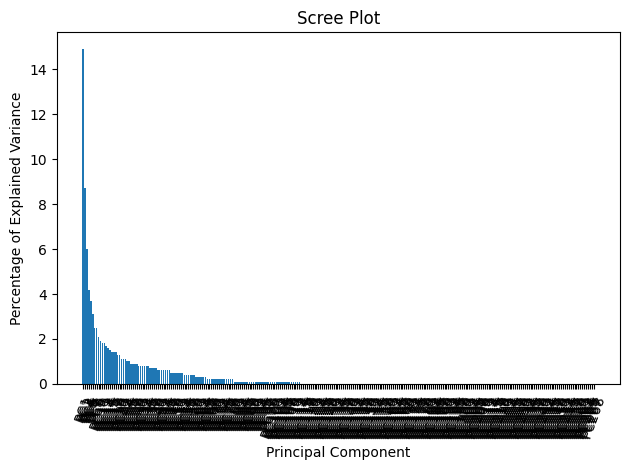

In [45]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.xticks(rotation=70)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

plt.tight_layout()
plt.show()

In [51]:
len(X_train.columns)

268

In [52]:
len(pca.components_[0])

268

In [53]:
loading_scores = pd.Series(pca.components_[0], index=X_train.columns)

In [54]:
loading_scores = pd.Series(pca.components_[0], index=X_train.columns)

In [56]:
top_20_variables = sorted_loading_scores[0:20].index.values
print(loading_scores[top_20_variables])

cancellation_policy          -0.391833
Refrigerator                  0.250503
Dishes and silverware         0.246796
Stove                         0.236154
Hot water                     0.236069
Microwave                     0.233548
Cooking basics                0.223544
Bed linens                    0.214025
Coffee maker                  0.206418
Oven                          0.206105
Long term stays allowed       0.181810
space                         0.159653
neighborhood_overview         0.157919
Hangers                       0.157885
Extra pillows and blankets    0.152278
Luggage dropoff allowed       0.147554
Iron                          0.144633
Hair dryer                    0.136671
Laptop friendly workspace     0.130682
Host greets you               0.118464
dtype: float64


#### Separando entradas e saídas de treinamento e teste

In [31]:
X_train = df_train.loc[:,df_train.columns != 'price'].copy()
Y_train = df_train.loc[:,['price']].copy()
X_test = df_test.copy()

In [32]:
#Importando modelo de Regressão Linear
from sklearn.linear_model import LinearRegression

In [33]:
#Realizando o treinamento do modelo
reg = LinearRegression().fit(X_train, Y_train)

In [34]:
reg.score(X_train, Y_train)

0.18921858113853995

In [35]:
predictions = reg.predict(X_test)